In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from minepy import MINE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import fetch_california_housing
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.inspection import permutation_importance
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso, LassoLarsIC, LassoLarsCV
import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../../data/tidy/data-aggregation.csv', index_col=[0])

In [3]:
df.head()

,households,med_hh_inc_dol,ms_cara,ms_carp,ms_pt,ms_taxi,ms_bike,ms_walk,ms_wfh,unemp,...,fueloil_gal,vmt,hh_2014,cf_transport_phh,cf_housing_phh,cf_food_phh,cf_goods_phh,cf_services_phh,cf_phh,cf
msa,,,,,,,,,,,,,,,,,,,,,
"Abilene, TX",60343,44249,0.806459,0.117276,0.006420,0.017641,0.002089,0.024034,0.026081,6.4,...,1.336685,76234.634771,65492.0,15.927517,12.674110,7.667713,4.616458,5.004892,49.144098,3.218545e+06
"Akron, OH",281752,50776,0.862746,0.066992,0.014979,0.005027,0.001327,0.016849,0.032080,9.7,...,79.046948,47008.858596,160668.0,15.993913,11.746599,7.517472,5.391050,6.071775,50.968122,8.188946e+06
"Albany, GA",58250,36805,0.804208,0.123413,0.010765,0.007939,0.001490,0.019618,0.032567,15.0,...,9.162196,72787.504018,57134.0,14.360085,13.990202,7.972296,4.684970,5.050888,46.428323,2.652636e+06
"Albany-Schenectady-Troy, NY",347401,61841,0.804724,0.076936,0.032160,0.009713,0.002339,0.036837,0.037290,7.4,...,1181.335835,103020.435963,392206.0,14.195390,10.778376,7.221763,5.349727,6.058857,47.021127,1.844197e+07
"Albuquerque, NM",344168,48875,0.799726,0.095175,0.018131,0.013973,0.009816,0.018735,0.044445,9.1,...,4.024810,101942.760602,305713.0,15.594705,13.531895,7.775563,5.051710,5.576700,49.593381,1.516134e+07


In [4]:
for column in df.columns:
    print(column)

households
med_hh_inc_dol
ms_cara
ms_carp
ms_pt
ms_taxi
ms_bike
ms_walk
ms_wfh
unemp
auto_commuters
annual_excess_fuel_consumed_commuters
ahd
tti
dvmt_freeway
ahd_truck
vmt_arterial
n
m
k_avg
edge_length_total
edge_length_avg
streets_per_node_avg
intersection_count
street_length_total
street_segment_count
street_length_avg
circuity_avg
self_loop_proportion
node_density_km
intersection_density_km
edge_density_km
street_density_km
builing_area_sqkm
area_sqkm
pop_2014
electricity_kwh
nat_gas_cuft
fueloil_gal
vmt
hh_2014
cf_transport_phh
cf_housing_phh
cf_food_phh
cf_goods_phh
cf_services_phh
cf_phh
cf


In [5]:
y = df['cf']

In [6]:
cols_to_plot = df.iloc[:, :-1]

In [7]:
cols_to_plot2 = df.iloc[:, :-8]

In [8]:
list(cols_to_plot2)

['households',
 'med_hh_inc_dol',
 'ms_cara',
 'ms_carp',
 'ms_pt',
 'ms_taxi',
 'ms_bike',
 'ms_walk',
 'ms_wfh',
 'unemp',
 'auto_commuters',
 'annual_excess_fuel_consumed_commuters',
 'ahd',
 'tti',
 'dvmt_freeway',
 'ahd_truck',
 'vmt_arterial',
 'n',
 'm',
 'k_avg',
 'edge_length_total',
 'edge_length_avg',
 'streets_per_node_avg',
 'intersection_count',
 'street_length_total',
 'street_segment_count',
 'street_length_avg',
 'circuity_avg',
 'self_loop_proportion',
 'node_density_km',
 'intersection_density_km',
 'edge_density_km',
 'street_density_km',
 'builing_area_sqkm',
 'area_sqkm',
 'pop_2014',
 'electricity_kwh',
 'nat_gas_cuft',
 'fueloil_gal',
 'vmt']

In [9]:
len(cols_to_plot2.columns)

40

In [10]:
#grid = sns.FacetGrid(df, col='cf', col_wrap=3)

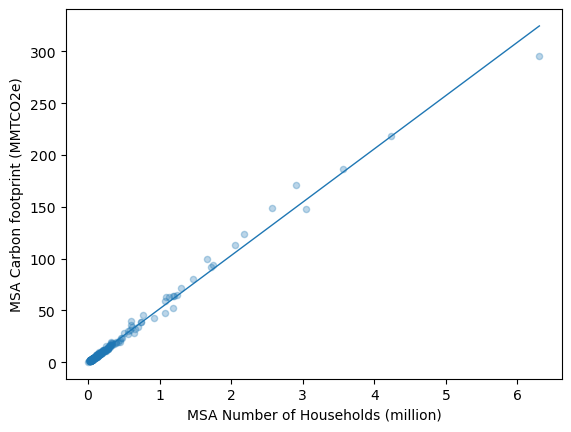

In [11]:
xa = df['hh_2014']/1e6
ya = df['cf']/1e6
g = sns.regplot(x=xa, y=ya, ci=None,scatter_kws=dict(alpha=0.3,s=20),line_kws=dict(lw=1))
g.set_ylabel('MSA Carbon footprint (MMTCO2e)')
g.set_xlabel('MSA Number of Households (million)')
plt.savefig('../../figures/cf_hh.png',dpi=300)

In [12]:
X = df['hh_2014'].values

In [13]:
Y = df['cf'].values

In [14]:
X = sm.add_constant(X, prepend=True)

In [15]:
lm = sm.OLS(Y,X)

In [16]:
result = lm.fit()

In [17]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 3.846e+04
Date:                Fri, 14 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:13:39   Log-Likelihood:                -5452.0
No. Observations:                 335   AIC:                         1.091e+04
Df Residuals:                     333   BIC:                         1.092e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.864e+04   1.69e+05      0.464      0.6

In [18]:
for column in cols_to_plot.columns:
    #grid.map(sns.scatterplot, x, y)
    x = df[column]
    fig = plt.figure(figsize=(8,8))
    plt.scatter(x, y)
    #grid.set_axis_labels(column, 'Total Carbon Footprint (tCO2/yr')
    #grid.set_titles('Total Carbon Footprint vs ' + column)
    plt.xlabel(column)
    plt.ylabel('Total Carbon Footprint (tCO2/yr)')
    plt.title('Total Carbon Footprint vs ' + column)
    plt.savefig('../../figures/' + column + '.png', dpi=300, facecolor='white')
    plt.close(fig)

50.38144102800955

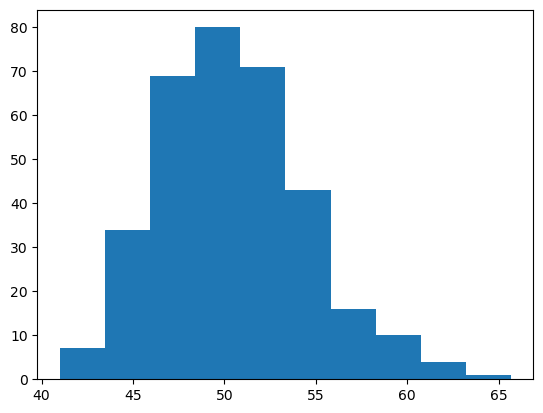

In [19]:
plt.hist(df['cf_phh'])
df['cf_phh'].mean()

In [20]:
len(X)

335

(array([307.,  15.,   5.,   2.,   3.,   1.,   1.,   0.,   0.,   1.]),
 array([   6815. ,  636707.4, 1266599.8, 1896492.2, 2526384.6, 3156277. ,
        3786169.4, 4416061.8, 5045954.2, 5675846.6, 6305739. ]),
 <BarContainer object of 10 artists>)

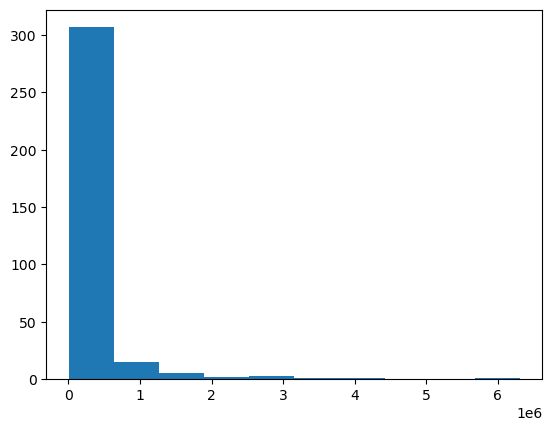

In [21]:
plt.hist(df['hh_2014'])

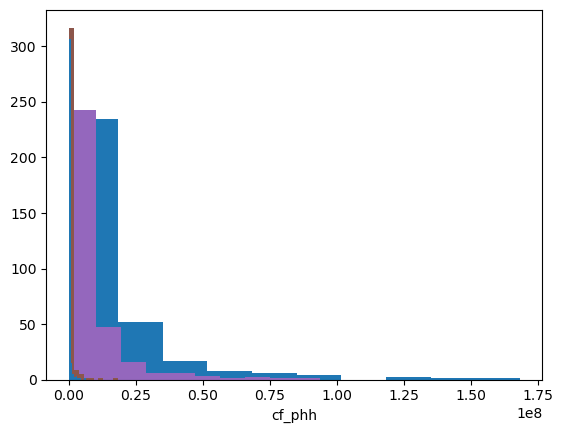

In [22]:
for column in cols_to_plot.columns:
    x = df[column]
    plt.hist(x)
    plt.xlabel(column)
    plt.show

In [23]:
X = cols_to_plot2

In [24]:
X = X.fillna(value=-999)

In [25]:
X.head()

,households,med_hh_inc_dol,ms_cara,ms_carp,ms_pt,ms_taxi,ms_bike,ms_walk,ms_wfh,unemp,...,intersection_density_km,edge_density_km,street_density_km,builing_area_sqkm,area_sqkm,pop_2014,electricity_kwh,nat_gas_cuft,fueloil_gal,vmt
msa,,,,,,,,,,,,,,,,,,,,,
"Abilene, TX",60343,44249,0.806459,0.117276,0.006420,0.017641,0.002089,0.024034,0.026081,6.4,...,1.669790,2406.696840,1251.142264,7.048505,7133.829924,160828.0,35714.088774,98701.118579,1.336685,76234.634771
"Akron, OH",281752,50776,0.862746,0.066992,0.014979,0.005027,0.001327,0.016849,0.032080,9.7,...,8.862967,6351.230011,3360.943838,14.307097,2391.975398,678301.0,23257.037633,121455.109113,79.046948,47008.858596
"Albany, GA",58250,36805,0.804208,0.123413,0.010765,0.007939,0.001490,0.019618,0.032567,15.0,...,1.667318,2287.583389,1195.808038,6.979580,4172.570196,141811.0,38975.470766,85814.672587,9.162196,72787.504018
"Albany-Schenectady-Troy, NY",347401,61841,0.804724,0.076936,0.032160,0.009713,0.002339,0.036837,0.037290,7.4,...,4.060365,3740.737967,1953.471821,41.455466,7451.054339,820825.0,36802.454287,233221.913105,1181.335835,103020.435963
"Albuquerque, NM",344168,48875,0.799726,0.095175,0.018131,0.013973,0.009816,0.018735,0.044445,9.1,...,1.791798,1738.064896,924.912213,75.879548,24078.610478,729083.0,49890.513214,147251.735865,4.024810,101942.760602


In [26]:
X

,households,med_hh_inc_dol,ms_cara,ms_carp,ms_pt,ms_taxi,ms_bike,ms_walk,ms_wfh,unemp,...,intersection_density_km,edge_density_km,street_density_km,builing_area_sqkm,area_sqkm,pop_2014,electricity_kwh,nat_gas_cuft,fueloil_gal,vmt
msa,,,,,,,,,,,,,,,,,,,,,
"Abilene, TX",60343,44249,0.806459,0.117276,0.006420,0.017641,0.002089,0.024034,0.026081,6.4,...,1.669790,2406.696840,1251.142264,7.048505,7133.829924,160828.0,35714.088774,98701.118579,1.336685,76234.634771
"Akron, OH",281752,50776,0.862746,0.066992,0.014979,0.005027,0.001327,0.016849,0.032080,9.7,...,8.862967,6351.230011,3360.943838,14.307097,2391.975398,678301.0,23257.037633,121455.109113,79.046948,47008.858596
"Albany, GA",58250,36805,0.804208,0.123413,0.010765,0.007939,0.001490,0.019618,0.032567,15.0,...,1.667318,2287.583389,1195.808038,6.979580,4172.570196,141811.0,38975.470766,85814.672587,9.162196,72787.504018
"Albany-Schenectady-Troy, NY",347401,61841,0.804724,0.076936,0.032160,0.009713,0.002339,0.036837,0.037290,7.4,...,4.060365,3740.737967,1953.471821,41.455466,7451.054339,820825.0,36802.454287,233221.913105,1181.335835,103020.435963
"Albuquerque, NM",344168,48875,0.799726,0.095175,0.018131,0.013973,0.009816,0.018735,0.044445,9.1,...,1.791798,1738.064896,924.912213,75.879548,24078.610478,729083.0,49890.513214,147251.735865,4.024810,101942.760602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yakima, WA",79717,43956,0.790040,0.135433,0.009615,0.011341,0.002054,0.017380,0.034137,10.0,...,0.741495,1268.384975,649.603673,15.772979,11159.882177,223444.0,10904.201630,35026.301318,36.846805,25270.202024
"York-Hanover, PA",168278,58906,0.848466,0.078800,0.008250,0.009867,0.002737,0.019114,0.032767,8.3,...,5.728582,5637.080320,2897.246871,18.432839,2357.826232,378985.0,11437.680565,48821.399761,177.074928,23741.762033
"Youngstown-Warren-Boardman, OH-PA",230317,42543,0.861136,0.073528,0.007002,0.009999,0.001090,0.016826,0.030420,9.4,...,4.425628,4371.706396,2299.329155,15.897550,4515.065516,592236.0,32983.813071,193107.802085,174.540216,63030.011887


In [27]:
rf = RandomForestRegressor(max_features=5, n_estimators=1000, random_state=0, ccp_alpha=0.001)

In [28]:
#?RandomForestRegressor

In [29]:
rf

RandomForestRegressor(ccp_alpha=0.001, max_features=5, n_estimators=1000,
                      random_state=0)

In [30]:
Y = df['cf']/1e+6

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state = 1)

In [32]:
y_train

msa
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD    148.362999
Muskegon, MI                                     3.494325
Owensboro, KY                                    2.411588
Texarkana, TX-AR                                 2.881796
Knoxville, TN                                   16.278935
                                                  ...    
Missoula, MT                                     2.039216
Richmond, VA                                    35.644579
Corvallis, OR                                    1.491116
Parkersburg-Vienna, WV                           1.994208
Bowling Green, KY                                2.824641
Name: cf, Length: 268, dtype: float64

In [33]:
X_train

,households,med_hh_inc_dol,ms_cara,ms_carp,ms_pt,ms_taxi,ms_bike,ms_walk,ms_wfh,unemp,...,intersection_density_km,edge_density_km,street_density_km,builing_area_sqkm,area_sqkm,pop_2014,electricity_kwh,nat_gas_cuft,fueloil_gal,vmt
msa,,,,,,,,,,,,,,,,,,,,,
"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",2229039,62169,0.734070,0.078420,0.095832,0.007934,0.006113,0.037253,0.040378,9.9,...,12.523537,7246.250474,3962.740575,132.423311,12602.190157,5671537.0,121876.560971,557802.410089,2423.594803,245378.321521
"Muskegon, MI",64889,41842,0.843075,0.094618,0.003720,0.007200,0.003929,0.011846,0.035612,14.1,...,4.660706,4438.398881,2287.819833,3.678997,1365.887402,172082.0,11288.712313,71846.001630,17.204065,23720.036802
"Owensboro, KY",45111,45639,0.865106,0.079089,0.003827,0.006111,0.001623,0.022342,0.021901,6.8,...,2.250640,2811.781094,1445.535686,2.358229,2409.092606,111620.0,45922.796650,123271.583378,9.045942,80455.334682
"Texarkana, TX-AR",55953,41818,0.849894,0.105848,0.003820,0.014770,0.000917,0.009354,0.015398,8.6,...,1.804536,2445.368011,1271.795995,3.986009,5525.520481,143104.0,39572.105762,100952.525760,1.546589,67679.127891
"Knoxville, TN",340980,44906,0.851397,0.086521,0.005567,0.006998,0.001450,0.011888,0.036180,8.2,...,4.263084,4004.603618,2098.509548,15.510000,8668.137169,722306.0,102067.410326,266293.324554,131.670681,204120.145662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Missoula, MT",45961,47029,0.719383,0.103453,0.018698,0.008915,0.039754,0.053401,0.056396,9.1,...,0.822827,1417.830459,728.071457,9.521971,6776.636297,93387.0,8683.432792,57081.624176,8.011961,24849.632336
"Richmond, VA",463593,59677,0.818281,0.090311,0.016715,0.010070,0.004441,0.015366,0.044816,8.2,...,4.091696,3416.332444,1863.099415,117.562870,11645.538157,742918.0,169595.138634,363246.107579,2040.560329,403675.442990
"Corvallis, OR",33376,49338,0.642487,0.082615,0.024110,0.009842,0.080584,0.086052,0.074309,8.7,...,1.676390,1908.260244,962.847757,6.088230,1758.540311,72682.0,9977.354419,34434.262328,11.456847,23215.181448


In [34]:
rf.fit(X_train, y_train)

RandomForestRegressor(ccp_alpha=0.001, max_features=5, n_estimators=1000,
                      random_state=0)

In [35]:
y_pred = rf.predict(X_test)

In [36]:
y_pred

array([  2.98967704,  55.65131865,   4.90612083,   2.69386815,
         2.26419513,  11.76743941,   4.94467114,  15.48560765,
         7.23405883,   8.20540522, 139.76486207,   3.01632738,
        25.80578774,   8.02284556,  61.42016403,  10.82276451,
        12.45243907,   1.82511395,   3.75581695,   6.95951664,
        15.74865392,   7.75681357,   2.51732715,   3.6175864 ,
         5.69684349,   2.44964004,   2.49931051,  79.9624479 ,
         5.02288156,   2.51093031,   4.42547938,  49.20629432,
         2.67654465,   3.00814408,   8.31689257,   3.03849689,
         2.2247733 ,   3.05561781,   6.49881178,   3.71946774,
         4.20873393,  16.48254052,   2.56671747,   2.51766661,
         1.93926718,   3.16974767,  63.34002588,   2.54317844,
         2.70236881,  11.98959648,   8.52111423,   9.89013961,
         3.23942328,   2.09871865,   3.14541113,   6.52958617,
        27.66797007,   3.14530837,   2.12261568,  10.56505328,
         3.75481464,   2.97648367,   4.93131248,   4.19

In [37]:
mean_squared_error(y_test, y_pred)

27.05219600090579

In [38]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.201172560193114

(0.0, 150.0)

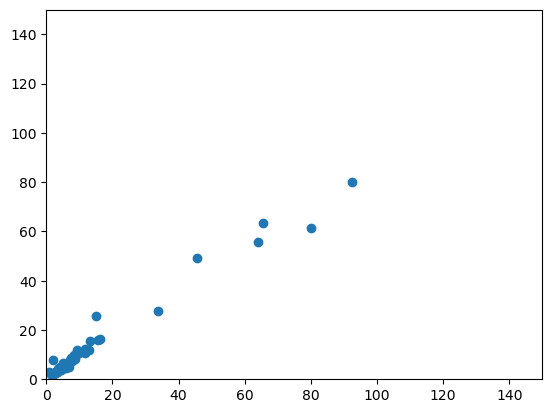

In [39]:
plt.scatter(y_test, y_pred)
plt.ylim(0, 150)
plt.xlim(0, 150)

In [40]:
mean_absolute_percentage_error(y_test, y_pred)

0.20470811892759982

In [41]:
result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
tree_importances = pd.Series(result.importances_mean, index=X.columns)

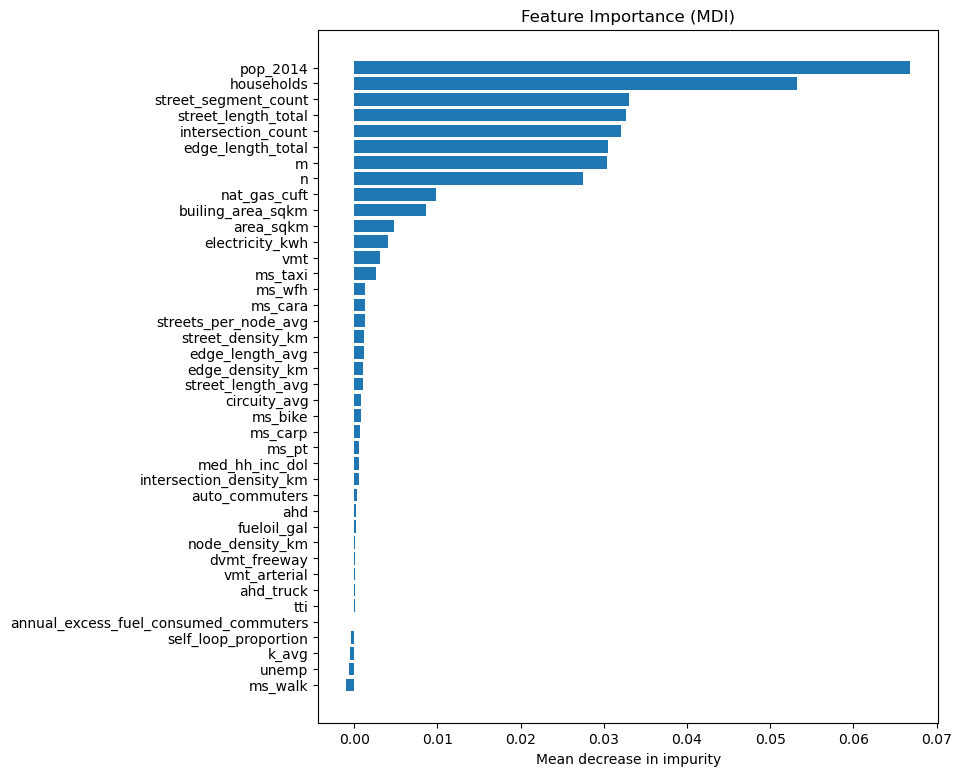

In [42]:
# sort features according to importance
sorted_idx = np.argsort(tree_importances)
pos = np.arange(sorted_idx.shape[0])

plt.figure(figsize=(8,9))
# plot feature importances
plt.barh(pos, tree_importances[sorted_idx], align="center")

plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");

In [43]:
X.columns

Index(['households', 'med_hh_inc_dol', 'ms_cara', 'ms_carp', 'ms_pt',
       'ms_taxi', 'ms_bike', 'ms_walk', 'ms_wfh', 'unemp', 'auto_commuters',
       'annual_excess_fuel_consumed_commuters', 'ahd', 'tti', 'dvmt_freeway',
       'ahd_truck', 'vmt_arterial', 'n', 'm', 'k_avg', 'edge_length_total',
       'edge_length_avg', 'streets_per_node_avg', 'intersection_count',
       'street_length_total', 'street_segment_count', 'street_length_avg',
       'circuity_avg', 'self_loop_proportion', 'node_density_km',
       'intersection_density_km', 'edge_density_km', 'street_density_km',
       'builing_area_sqkm', 'area_sqkm', 'pop_2014', 'electricity_kwh',
       'nat_gas_cuft', 'fueloil_gal', 'vmt'],
      dtype='object')

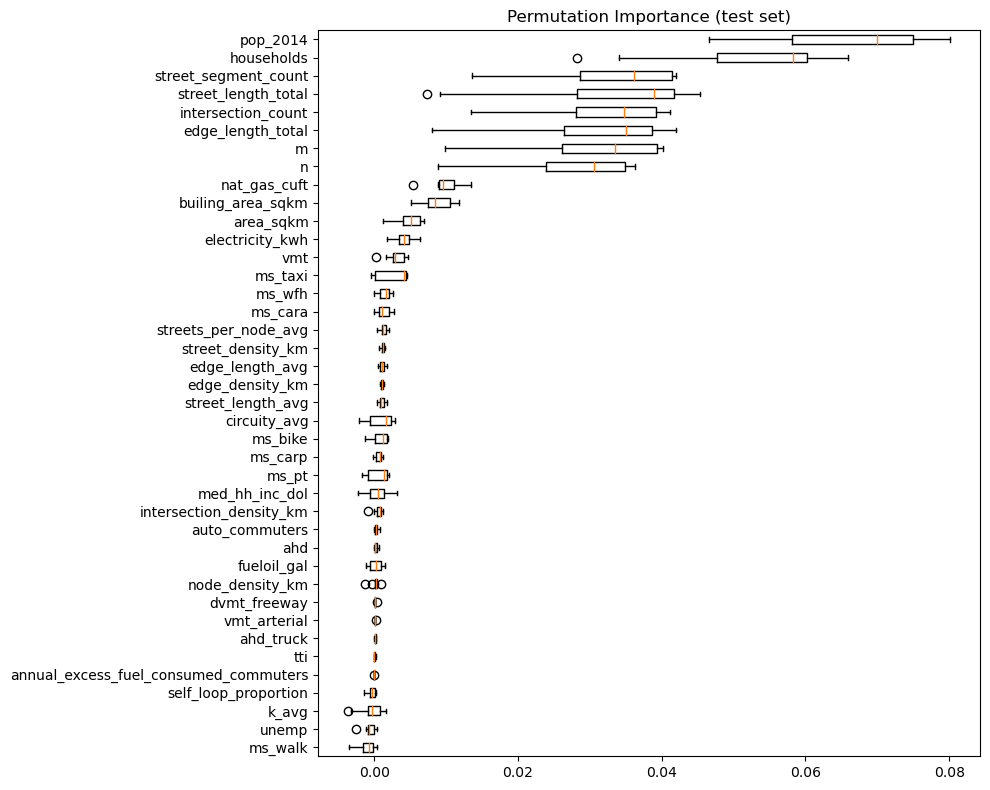

In [44]:
plt.figure(figsize=(10,8))
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[sorted_idx],)

plt.title("Permutation Importance (test set)")
plt.tight_layout()
plt.savefig('../../figures/perm_imp.png',dpi=300)

In [45]:
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
lasso_cv = make_pipeline(StandardScaler(), LassoCV(cv=20)).fit(X_train, y_train)
#best_model = lasso_cv.fit(X_train, y_train) # the normal standardization is done by default
t_lasso_cv = time.time() - t1

Computing regularization path using the coordinate descent lasso...


C:\Users\rostnv\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.10334347448952, tolerance: 17.19957830047593
  model = cd_fast.enet_coordinate_descent_gram(


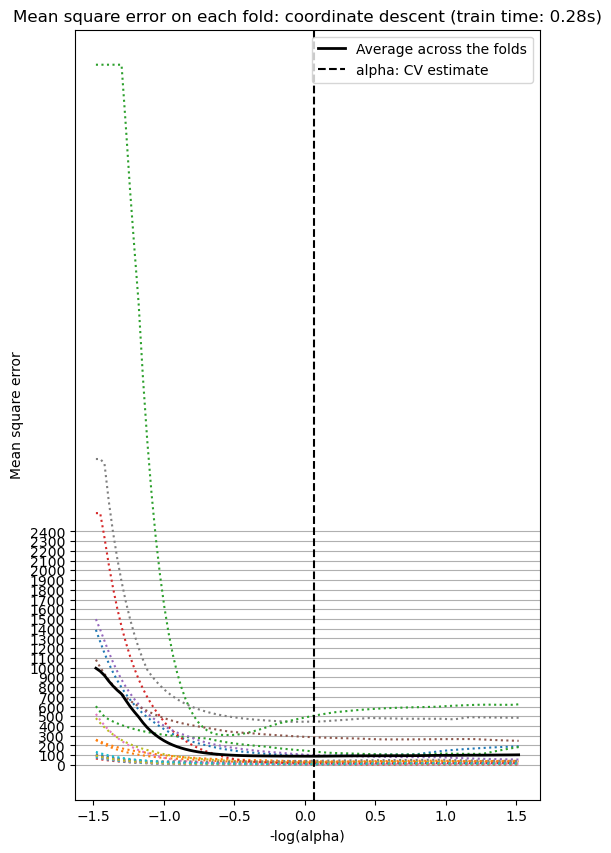

In [46]:
# This is to avoid division by zero while doing np.log10
EPSILON = 1e-4
# Display results
lasso = lasso_cv[-1]
m_log_alphas = -np.log10(lasso.alphas_ + EPSILON)

plt.figure(figsize=(6,10))
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, lasso.mse_path_, ':')
plt.plot(m_log_alphas, lasso.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(lasso.alpha_ + EPSILON), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.yticks(np.arange(0,2500,100))
plt.grid(axis='y')
plt.axis('tight')
plt.show()

Best alpha using built-in LassoCV: 0.864815
Best score using built-in LassoCV: 0.872789


C:\Users\rostnv\miniconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'Feature importance using Lasso Model')

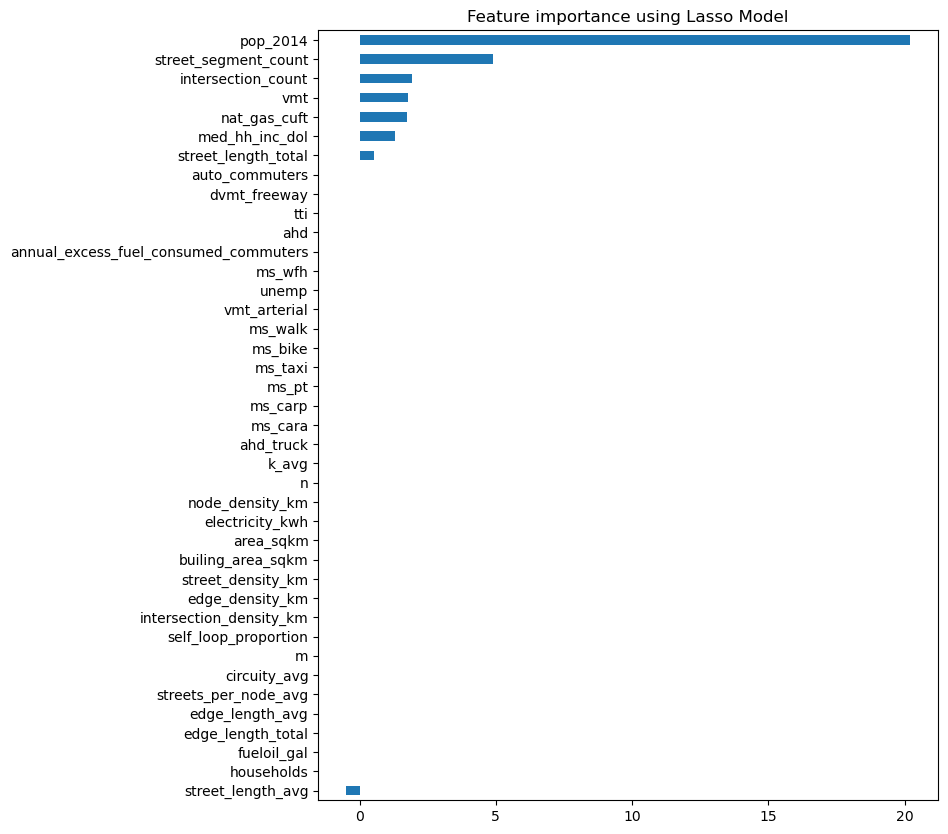

In [47]:
print("Best alpha using built-in LassoCV: %f" % lasso.alpha_)
print("Best score using built-in LassoCV: %f" %lasso.score(X,y))
coef = pd.Series(lasso.coef_, index = X.columns)
imp_coef = coef.sort_values()
plt.figure(figsize=(8,10))
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [48]:
np.min(lasso.mse_path_)

1.8937264248120242

In [49]:
X

,households,med_hh_inc_dol,ms_cara,ms_carp,ms_pt,ms_taxi,ms_bike,ms_walk,ms_wfh,unemp,...,intersection_density_km,edge_density_km,street_density_km,builing_area_sqkm,area_sqkm,pop_2014,electricity_kwh,nat_gas_cuft,fueloil_gal,vmt
msa,,,,,,,,,,,,,,,,,,,,,
"Abilene, TX",60343,44249,0.806459,0.117276,0.006420,0.017641,0.002089,0.024034,0.026081,6.4,...,1.669790,2406.696840,1251.142264,7.048505,7133.829924,160828.0,35714.088774,98701.118579,1.336685,76234.634771
"Akron, OH",281752,50776,0.862746,0.066992,0.014979,0.005027,0.001327,0.016849,0.032080,9.7,...,8.862967,6351.230011,3360.943838,14.307097,2391.975398,678301.0,23257.037633,121455.109113,79.046948,47008.858596
"Albany, GA",58250,36805,0.804208,0.123413,0.010765,0.007939,0.001490,0.019618,0.032567,15.0,...,1.667318,2287.583389,1195.808038,6.979580,4172.570196,141811.0,38975.470766,85814.672587,9.162196,72787.504018
"Albany-Schenectady-Troy, NY",347401,61841,0.804724,0.076936,0.032160,0.009713,0.002339,0.036837,0.037290,7.4,...,4.060365,3740.737967,1953.471821,41.455466,7451.054339,820825.0,36802.454287,233221.913105,1181.335835,103020.435963
"Albuquerque, NM",344168,48875,0.799726,0.095175,0.018131,0.013973,0.009816,0.018735,0.044445,9.1,...,1.791798,1738.064896,924.912213,75.879548,24078.610478,729083.0,49890.513214,147251.735865,4.024810,101942.760602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yakima, WA",79717,43956,0.790040,0.135433,0.009615,0.011341,0.002054,0.017380,0.034137,10.0,...,0.741495,1268.384975,649.603673,15.772979,11159.882177,223444.0,10904.201630,35026.301318,36.846805,25270.202024
"York-Hanover, PA",168278,58906,0.848466,0.078800,0.008250,0.009867,0.002737,0.019114,0.032767,8.3,...,5.728582,5637.080320,2897.246871,18.432839,2357.826232,378985.0,11437.680565,48821.399761,177.074928,23741.762033
"Youngstown-Warren-Boardman, OH-PA",230317,42543,0.861136,0.073528,0.007002,0.009999,0.001090,0.016826,0.030420,9.4,...,4.425628,4371.706396,2299.329155,15.897550,4515.065516,592236.0,32983.813071,193107.802085,174.540216,63030.011887


In [50]:
df

,households,med_hh_inc_dol,ms_cara,ms_carp,ms_pt,ms_taxi,ms_bike,ms_walk,ms_wfh,unemp,...,fueloil_gal,vmt,hh_2014,cf_transport_phh,cf_housing_phh,cf_food_phh,cf_goods_phh,cf_services_phh,cf_phh,cf
msa,,,,,,,,,,,,,,,,,,,,,
"Abilene, TX",60343,44249,0.806459,0.117276,0.006420,0.017641,0.002089,0.024034,0.026081,6.4,...,1.336685,76234.634771,65492.0,15.927517,12.674110,7.667713,4.616458,5.004892,49.144098,3.218545e+06
"Akron, OH",281752,50776,0.862746,0.066992,0.014979,0.005027,0.001327,0.016849,0.032080,9.7,...,79.046948,47008.858596,160668.0,15.993913,11.746599,7.517472,5.391050,6.071775,50.968122,8.188946e+06
"Albany, GA",58250,36805,0.804208,0.123413,0.010765,0.007939,0.001490,0.019618,0.032567,15.0,...,9.162196,72787.504018,57134.0,14.360085,13.990202,7.972296,4.684970,5.050888,46.428323,2.652636e+06
"Albany-Schenectady-Troy, NY",347401,61841,0.804724,0.076936,0.032160,0.009713,0.002339,0.036837,0.037290,7.4,...,1181.335835,103020.435963,392206.0,14.195390,10.778376,7.221763,5.349727,6.058857,47.021127,1.844197e+07
"Albuquerque, NM",344168,48875,0.799726,0.095175,0.018131,0.013973,0.009816,0.018735,0.044445,9.1,...,4.024810,101942.760602,305713.0,15.594705,13.531895,7.775563,5.051710,5.576700,49.593381,1.516134e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yakima, WA",79717,43956,0.790040,0.135433,0.009615,0.011341,0.002054,0.017380,0.034137,10.0,...,36.846805,25270.202024,79421.0,16.793236,10.812623,9.075718,4.896841,5.181530,52.740562,4.188708e+06
"York-Hanover, PA",168278,58906,0.848466,0.078800,0.008250,0.009867,0.002737,0.019114,0.032767,8.3,...,177.074928,23741.762033,155267.0,16.397364,14.406175,7.592190,5.373498,6.037303,51.797720,8.042477e+06
"Youngstown-Warren-Boardman, OH-PA",230317,42543,0.861136,0.073528,0.007002,0.009999,0.001090,0.016826,0.030420,9.4,...,174.540216,63030.011887,254138.0,14.373674,17.003000,7.355032,4.818378,5.322254,46.243012,1.175211e+07


# Urban typology dataset

As an example of some simple data analysis tasks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_excel('../Data/FINAL-COMBINED-DATASET-urban-typologies.xlsx', sheet_name='data')

In [4]:
df.head()

,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),...,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
0,Kabul,1,1,Congested Emerging,Afghanistan,17.7,49.6,0,32.7,0.65,...,0.000000,0.079425,0.012067,0.373602,0.029561,0.221471,0.310268,0.707286,0.211824,0.330575
1,Algiers,2,1,Congested Emerging,Algeria,12.8,28.7,NaN,55.8,0.37,...,NaN,0.127131,0.081778,0.375540,0.118424,0.344736,0.173201,0.656164,0.559870,0.380830
2,Oran,3,2,BusTransit Sprawl,Algeria,NaN,NaN,NaN,NaN,0.37,...,0.017992,0.047502,0.088082,0.388473,0.231902,0.311532,0.114422,0.554905,0.689737,0.499762
3,Luanda,4,3,Congested Boomer,Angola,NaN,NaN,NaN,NaN,0.76,...,0.000000,0.061402,0.087578,0.000000,0.485812,0.175425,0.429534,0.642123,0.331717,0.514084
4,Huambo,5,1,Congested Emerging,Angola,NaN,NaN,NaN,NaN,0.76,...,0.000000,0.074822,0.037257,0.342958,0.043231,0.343601,0.206326,0.687646,0.458215,0.313614


Let's do some data exploration, using:
- boxplots
- scatterplots
- histograms
- etc

In [5]:
df.columns

Index(['City', 'cityID', 'clusterID', 'Typology', 'Country',
       'Car Modeshare (%)', 'Public Transit Modeshare (%)',
       'Bicycle Modeshare (%)', 'Walking Modeshare (%)',
       'Gasoline Pump Price (USD/liter)', 'Road Deaths Rate (per 1000)',
       'Subway Length (km)', 'Subway Length Density (per km)',
       'Subway Stations per Hundred Thousand', 'Subway Ridership per Capita',
       'Subway Age (years)', 'BRT Length (km)',
       'BRT System Length Density (per km)',
       'BRT Stations per Hundred Thousand Persons',
       'BRT Fleet per Hundred Thousand Persons',
       'BRT Annual Ridership per Capita', 'BRT Age (years)',
       'Bikeshare Stations', 'Bikeshare Stations per Hundred Thousand Persons',
       'Bikeshare Number of Bikes',
       'Bikeshare Bicycles per Hundred Thousand Persons',
       'Bikeshare Age (years)', 'Congestion (%)', 'Congestion AM Peak (%)',
       'Congestion PM Peak (%)', 'Traffic Index', 'Travel Time Index',
       'Inefficiency Index', 'Po

(array([ 8., 18., 27., 36., 25., 10., 11.,  3.,  3.,  1.]),
 array([22.27 , 27.148, 32.026, 36.904, 41.782, 46.66 , 51.538, 56.416,
        61.294, 66.172, 71.05 ]),
 <BarContainer object of 10 artists>)

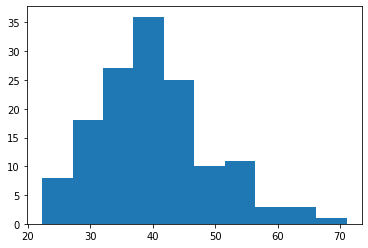

In [6]:
plt.hist(df['Travel Time Index'])

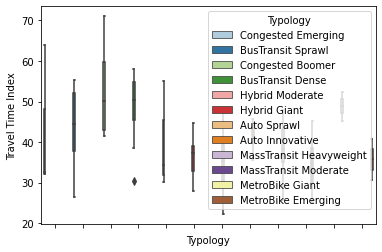

In [7]:
ax = sns.boxplot(y = 'Travel Time Index', x = 'Typology', hue = 'Typology', data = df, palette = "Paired")
#remove x-axis labels
ax.set(xticklabels=[]);
#plt.legend(True)

#play around with legend position, etc.


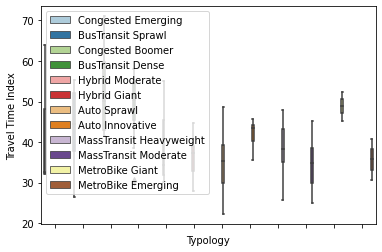

In [8]:
ax = sns.boxplot(y = 'Travel Time Index', x = 'Typology', hue = 'Typology', data = df, palette = "Paired")
#remove x-axis labels
ax.set(xticklabels=[]);
#play around with legend position, etc.
plt.legend(loc='upper left')
#plt.legend(True)

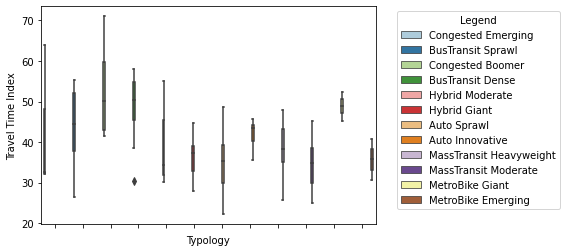

In [9]:
ax = sns.boxplot(y = 'Travel Time Index', x = 'Typology', hue = 'Typology', data = df, palette = "Paired")
#remove x-axis labels
ax.set(xticklabels=[]);
#play around with legend position, etc.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Legend');
#plt.legend(True)

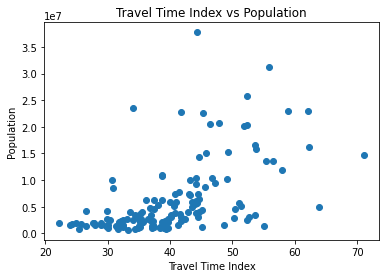

In [26]:
plt.scatter(df['Travel Time Index'],df['Population']);
plt.xlabel("Travel Time Index");
plt.ylabel("Population");
plt.title("Travel Time Index vs Population");

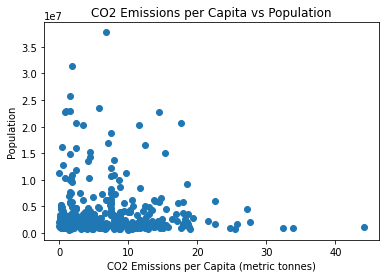

In [27]:
plt.scatter(df['CO2 Emissions per Capita (metric tonnes)'],df['Population']);
plt.xlabel("CO2 Emissions per Capita (metric tonnes)");
plt.ylabel("Population");
plt.title("CO2 Emissions per Capita vs Population");